<a href="https://colab.research.google.com/github/mtello5/IS170_Machine_Learning/blob/Regression-Analysis/Breast_Cancer_Logistical_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW 8 (Regression Models) | Matthew Tello

In [ ]:

#Breast Cancer - there are ten independent variables: 'radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean', 'concave points_mean','symmetry_mean','fractal_dimension_mean'
#and one dependent variable - malignant(1) or benign(0). (1 = Cancer)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('/content/breast-cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#  Converting 'diagnosis' column to 1 = Malignant (cancerous), 0 = Benign (non-cancerous)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
#'ten independent variables
#and 'diagnosis'is the dependent variable
x=df[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean', 'concave points_mean','symmetry_mean','fractal_dimension_mean']]
y=df[['diagnosis']]


In [ ]:
#splitting the dataset into training and test sets.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25)

In [ ]:

from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)


In [ ]:
#fitting logistic regression to the training set

from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

#For more info on the LogitsticRegression and its parameters, https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#andom_state: Whenever randomization is part of a Scikit-learn algorithm, a random_state parameter may be provided to control the random number generator used. 
#Note that the mere presence of random_state doesn’t mean that randomization is always used, as it may be dependent on another parameter, e.g. shuffle, being set.
#The passed value will have an effect on the reproducibility of the results returned by the function

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [ ]:
LogisticRegression(C=1.0,class_weight=None, dual=False,fit_intercept=True,
                   intercept_scaling=1,l1_ratio=None, max_iter=100,
                   multi_class='warn',n_jobs=None,penalty=12,
                   random_state=0,solver='warn',tol=0.0001,verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', penalty=12, random_state=0,
                   solver='warn')

In [ ]:
#predicting the test set result
y_pred=classifier.predict(x_test)


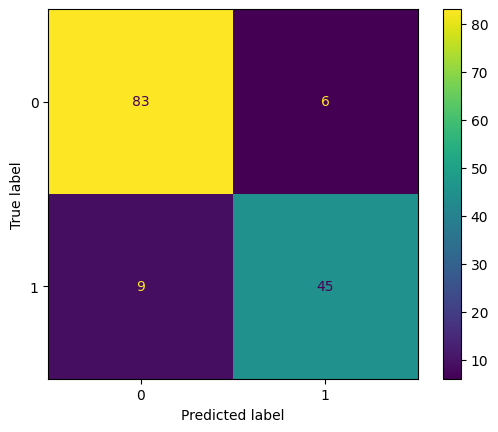

In [ ]:
#Creating the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


The confusion matrix reveals that the model correctly identified 83 instances as positive and 45 instances as negative. However, it incorrectly categorized six instances as positive when they should have been negative, and nine instances as negative when they should have been positive. 

The model's True Positive Rate (TPR) would be:
 83/(83+9) = 0.902 (90.2%)
 
 The model's False Postive Rate (FPR) would be:
 FPR = 6/(6+45) = 0.118 (11.8%)

 Overall, the model is about 90% accurate in determining using the 10 independent variables if a breast cancer is cancerous or not.